# Разведочный анализ данных

In [2]:
from python_files.data import data

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Основные характеристики датасета

In [2]:
data.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [5]:
data.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean            44.252199     6.899222          57.153929  
std             45.015793     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%             90.000000     8.586293          64.944961  
max             90.000000    14.440522         103.988901

#### Перероверим наличие пустых значений - пропусков нет

In [6]:
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Соотношение матрица-наполнитель - 0
Плотность, кг/м3 - 0
модуль упругости, ГПа - 0
Количество отвердителя, м.% - 0
Содержание эпоксидных групп,%_2 - 0
Температура вспышки, С_2 - 0
Поверхностная плотность, г/м2 - 0
Модуль упругости при растяжении, ГПа - 0
Прочность при растяжении, МПа - 0
Потребление смолы, г/м2 - 0
Угол нашивки, град - 0
Шаг нашивки - 0
Плотность нашивки - 0


#### Определим число уникальных значений для целевого признака - из 1023 значений 1004 уникальных

In [7]:
unique_val = data['Модуль упругости при растяжении, ГПа'].unique()
unique_val.shape

(1004,)

## Гистограмма распределения для каждой из переменных

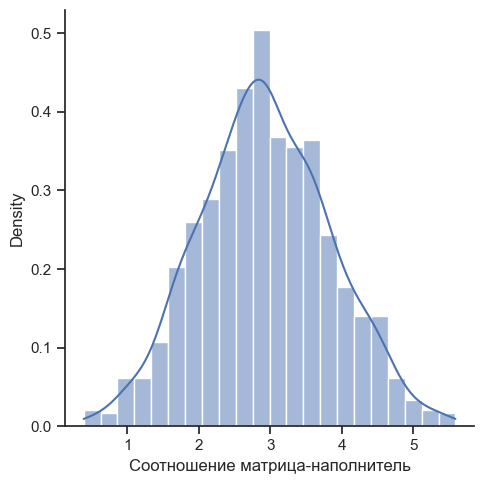

In [55]:
sns.displot(data['Соотношение матрица-наполнитель'], kde=True, stat="density")

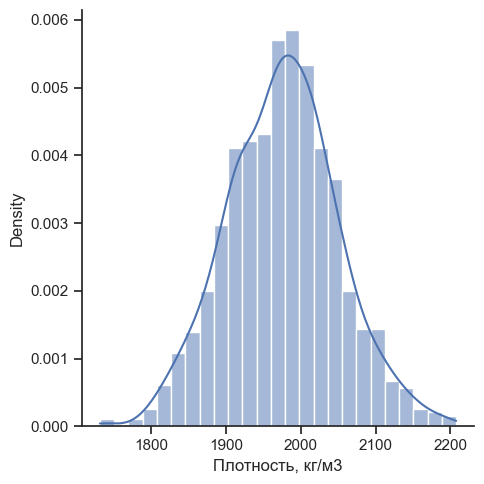

In [9]:
sns.displot(data['Плотность, кг/м3'], kde=True, stat="density")

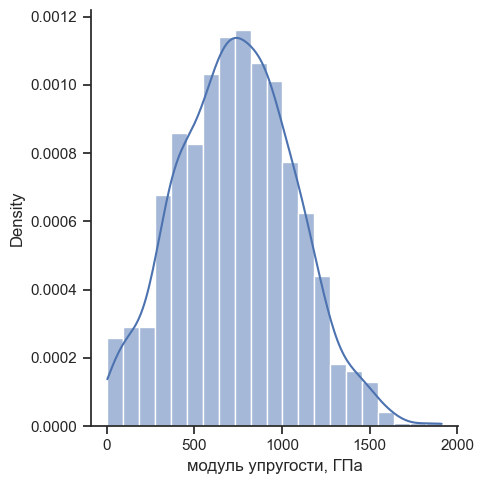

In [10]:
sns.displot(data['модуль упругости, ГПа'], kde=True, stat="density")

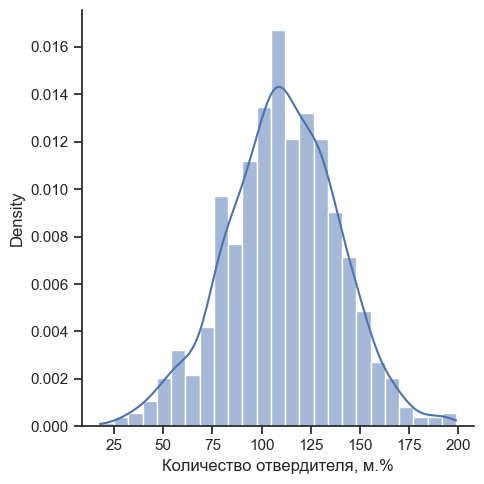

In [11]:
sns.displot(data['Количество отвердителя, м.%'], kde=True, stat="density")

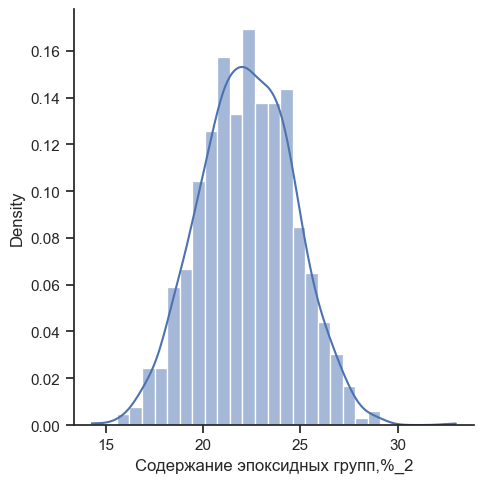

In [12]:
sns.displot(data['Содержание эпоксидных групп,%_2'], kde=True, stat="density")

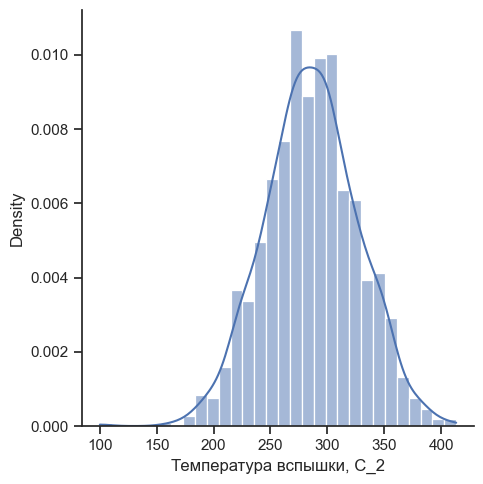

In [13]:
sns.displot(data['Температура вспышки, С_2'], kde=True, stat="density")

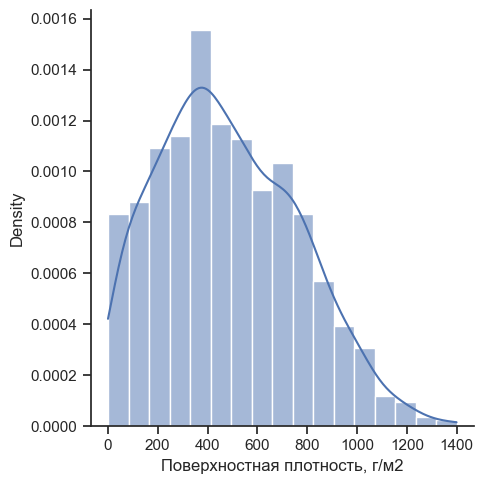

In [36]:
sns.displot(data['Поверхностная плотность, г/м2'], kde=True, stat="density")

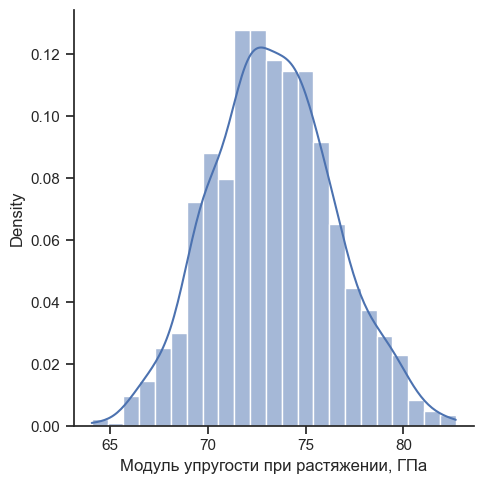

In [37]:
sns.displot(data['Модуль упругости при растяжении, ГПа'], kde=True, stat="density")

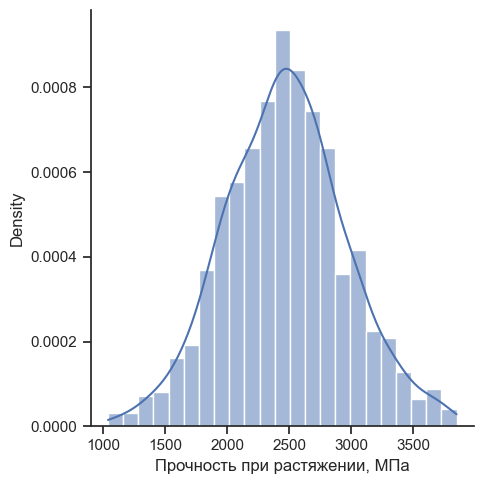

In [38]:
sns.displot(data['Прочность при растяжении, МПа'], kde=True, stat="density")

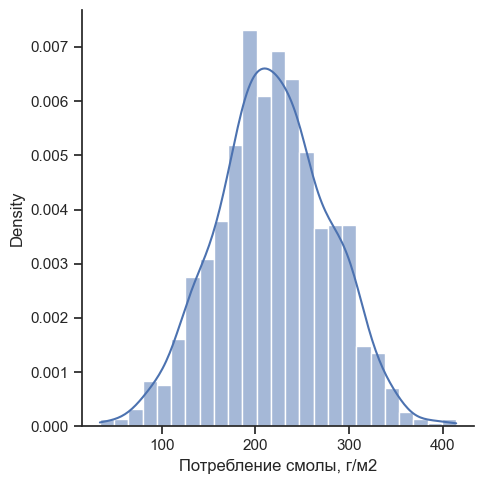

In [39]:
sns.displot(data['Потребление смолы, г/м2'], kde=True, stat="density")

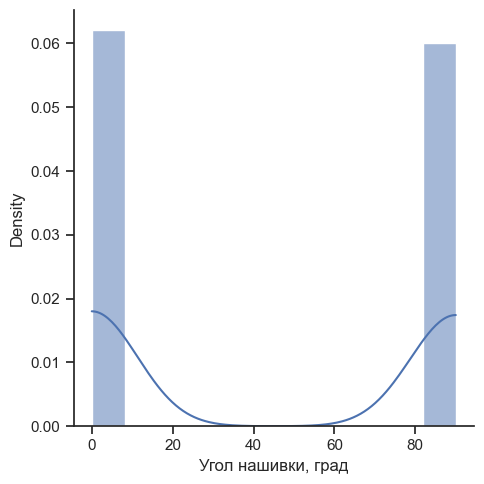

In [40]:
sns.displot(data['Угол нашивки, град'], kde=True, stat="density")

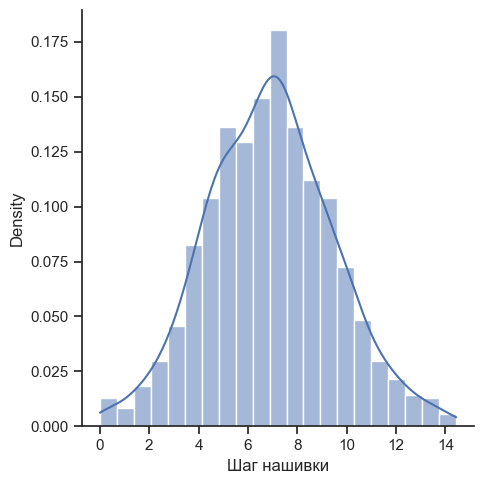

In [41]:
sns.displot(data['Шаг нашивки'], kde=True, stat="density")

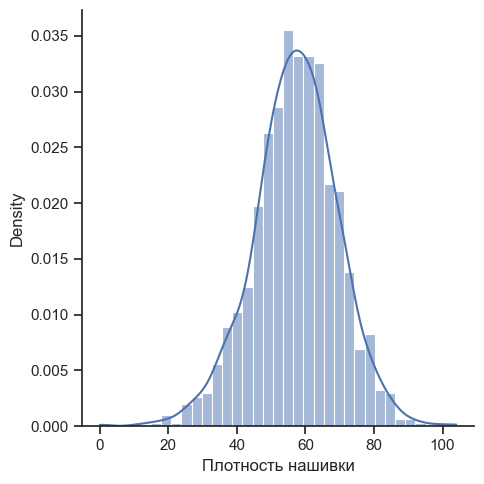

In [42]:
sns.displot(data['Плотность нашивки'], kde=True, stat="density")

## Диаграмма "ящик с усами" для каждой из переменных

<AxesSubplot: xlabel='Соотношение матрица-наполнитель'>

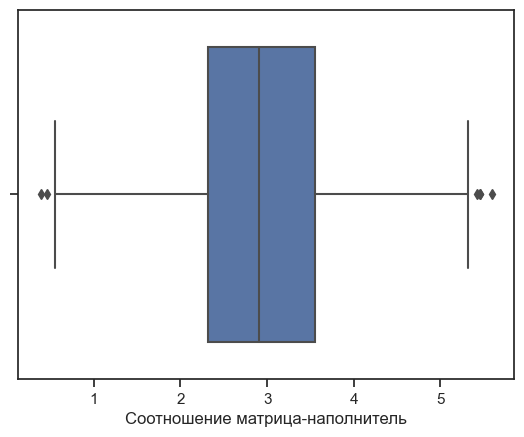

In [43]:
sns.boxplot(x=data['Соотношение матрица-наполнитель'])

<AxesSubplot: xlabel='Плотность, кг/м3'>

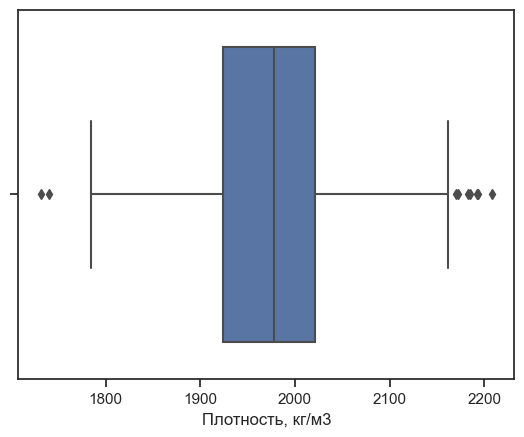

In [46]:
sns.boxplot(x=data['Плотность, кг/м3'])

<AxesSubplot: xlabel='модуль упругости, ГПа'>

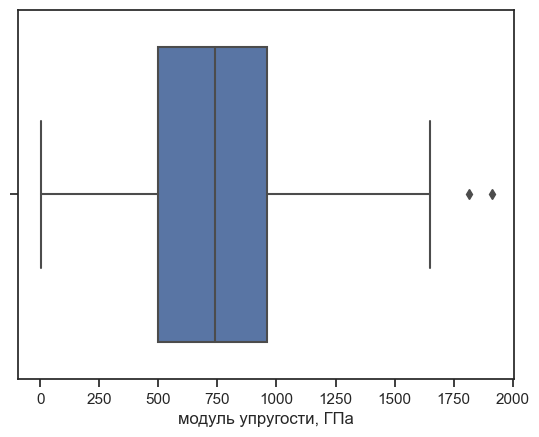

In [47]:
sns.boxplot(x=data['модуль упругости, ГПа'])

<AxesSubplot: xlabel='Количество отвердителя, м.%'>

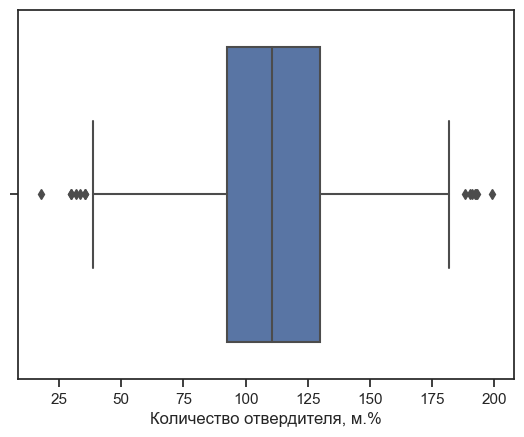

In [48]:
sns.boxplot(x=data['Количество отвердителя, м.%'])

<AxesSubplot: xlabel='Содержание эпоксидных групп,%_2'>

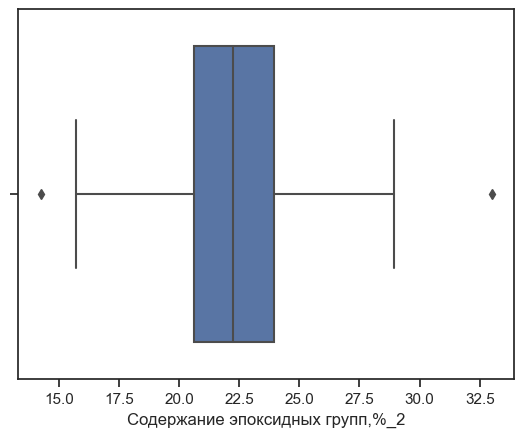

In [49]:
sns.boxplot(x=data['Содержание эпоксидных групп,%_2'])

<AxesSubplot: xlabel='Температура вспышки, С_2'>

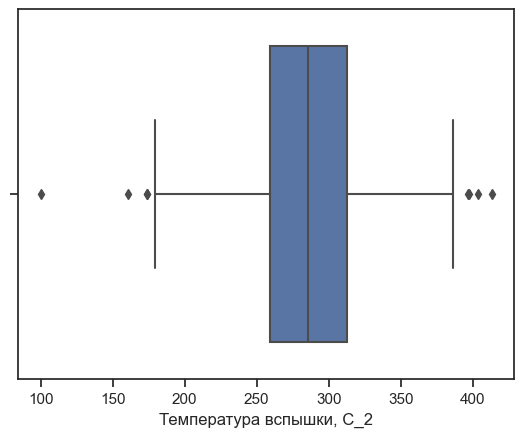

In [50]:
sns.boxplot(x=data['Температура вспышки, С_2'])

<AxesSubplot: xlabel='Поверхностная плотность, г/м2'>

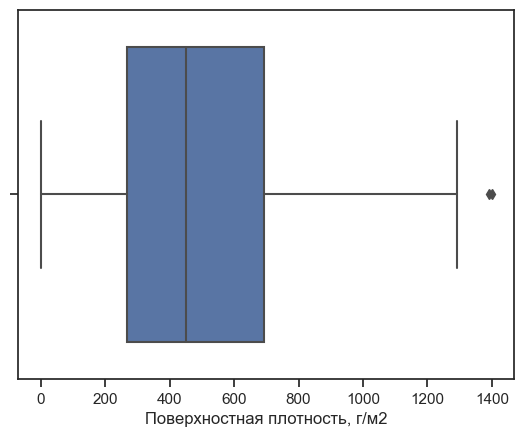

In [51]:
sns.boxplot(x=data['Поверхностная плотность, г/м2'])

<AxesSubplot: xlabel='Модуль упругости при растяжении, ГПа'>

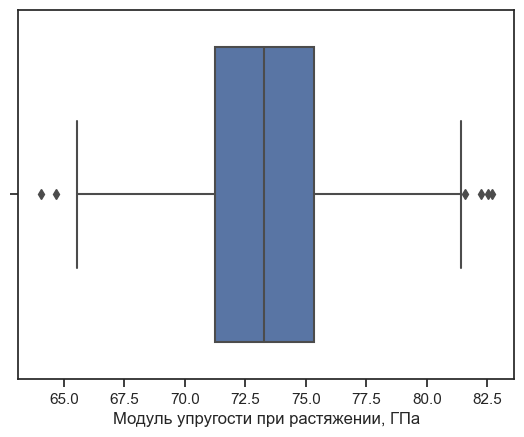

In [52]:
sns.boxplot(x=data['Модуль упругости при растяжении, ГПа'])

<AxesSubplot: xlabel='Прочность при растяжении, МПа'>

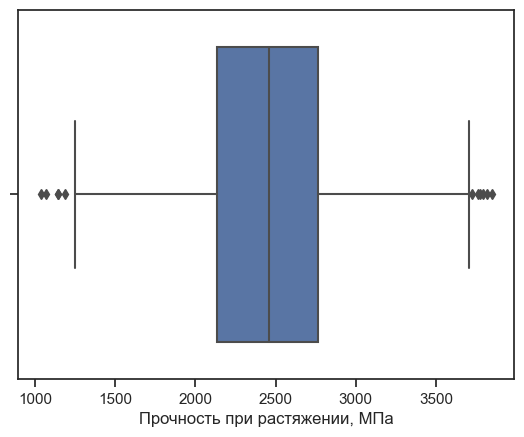

In [53]:
sns.boxplot(x=data['Прочность при растяжении, МПа'])

<AxesSubplot: xlabel='Потребление смолы, г/м2'>

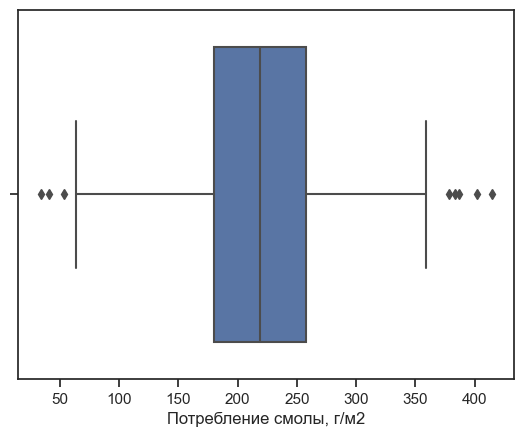

In [54]:
sns.boxplot(x=data['Потребление смолы, г/м2'])

<AxesSubplot: xlabel='Угол нашивки, град'>

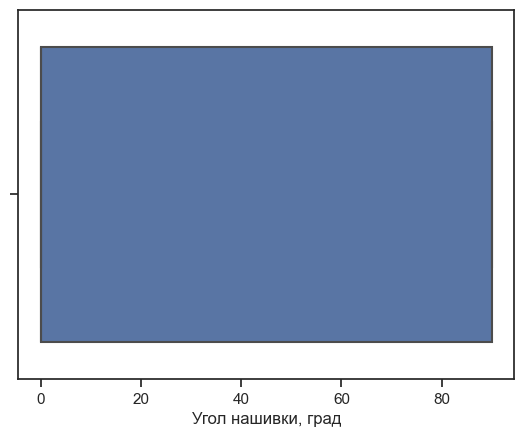

In [55]:
sns.boxplot(x=data['Угол нашивки, град'])

<AxesSubplot: xlabel='Шаг нашивки'>

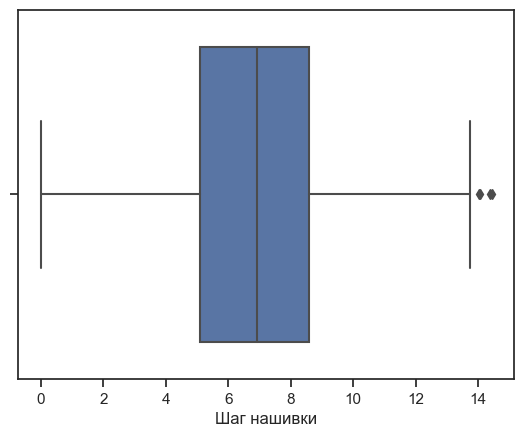

In [56]:
sns.boxplot(x=data['Шаг нашивки'])

<AxesSubplot: xlabel='Плотность нашивки'>

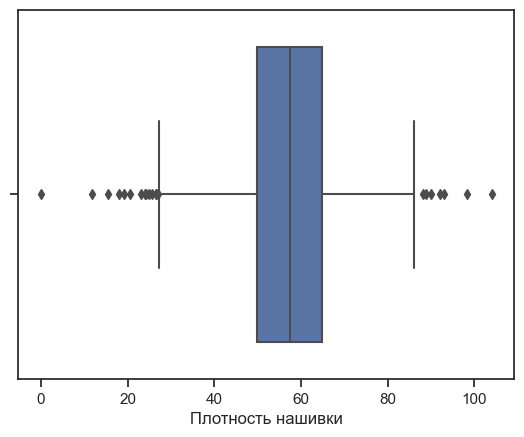

In [57]:
sns.boxplot(x=data['Плотность нашивки'])

## Попарные графики рассеяния точек

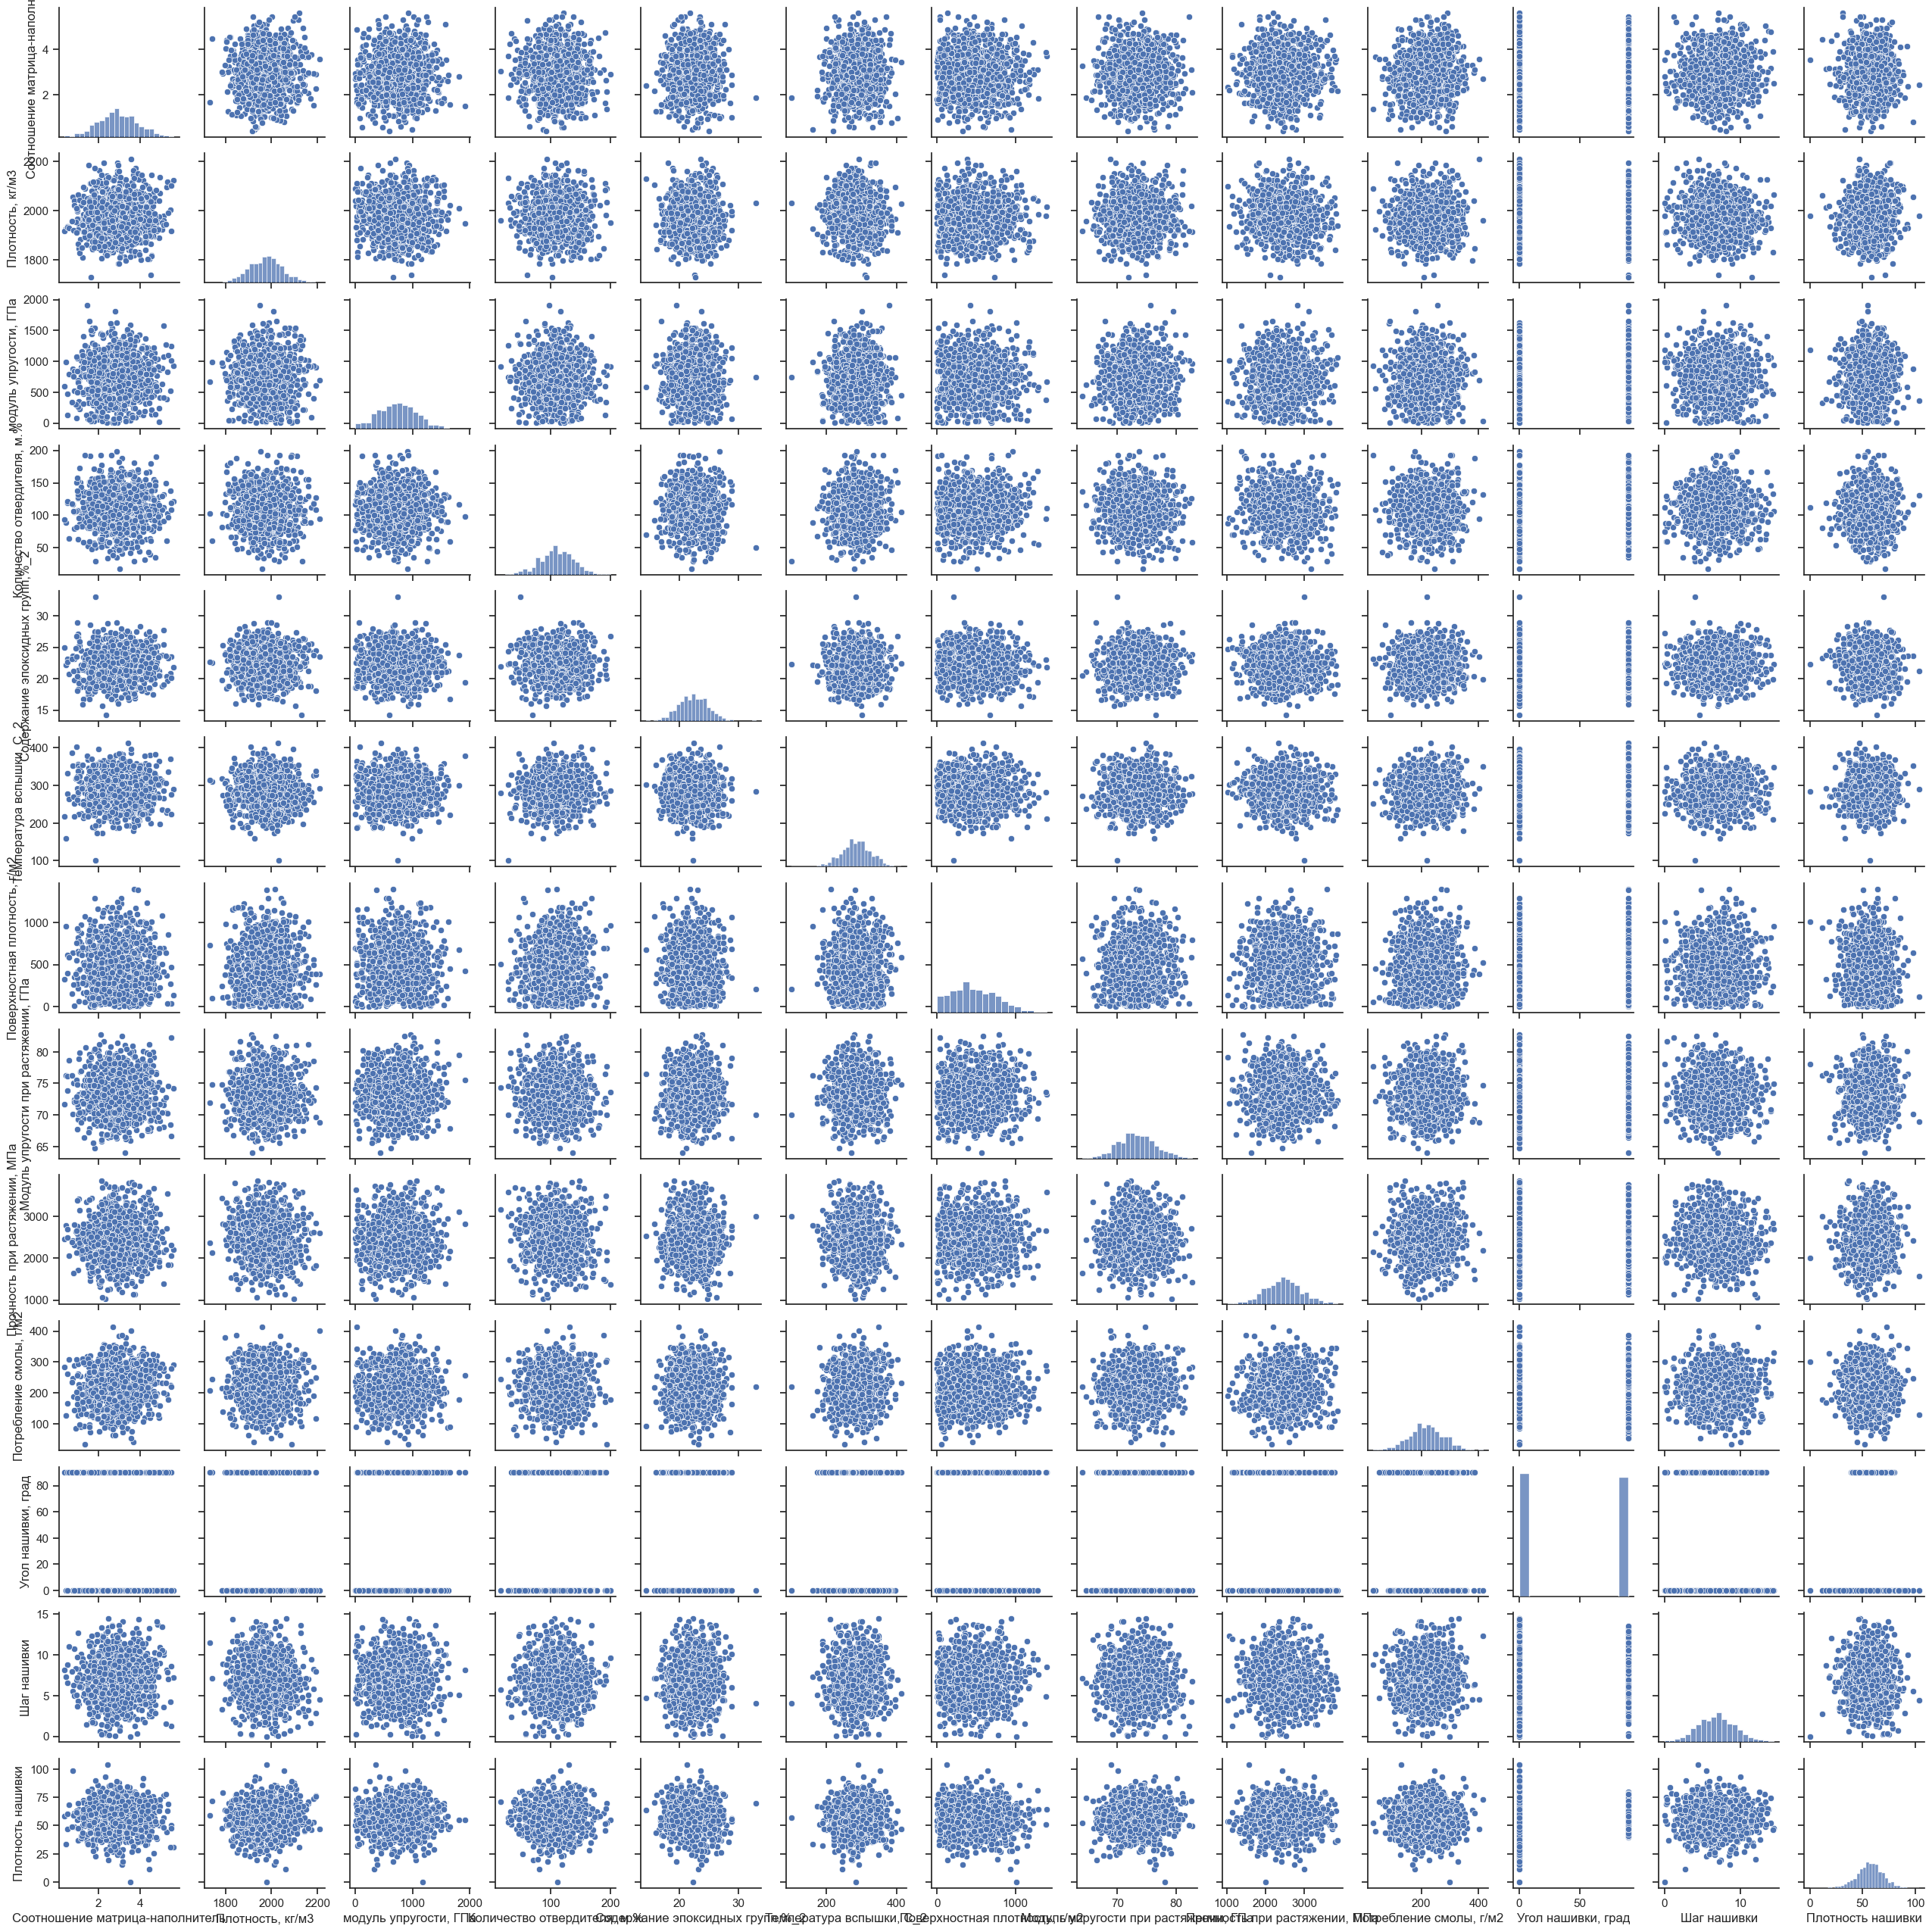

In [4]:
sns.pairplot(data, height = 2, aspect = 1)

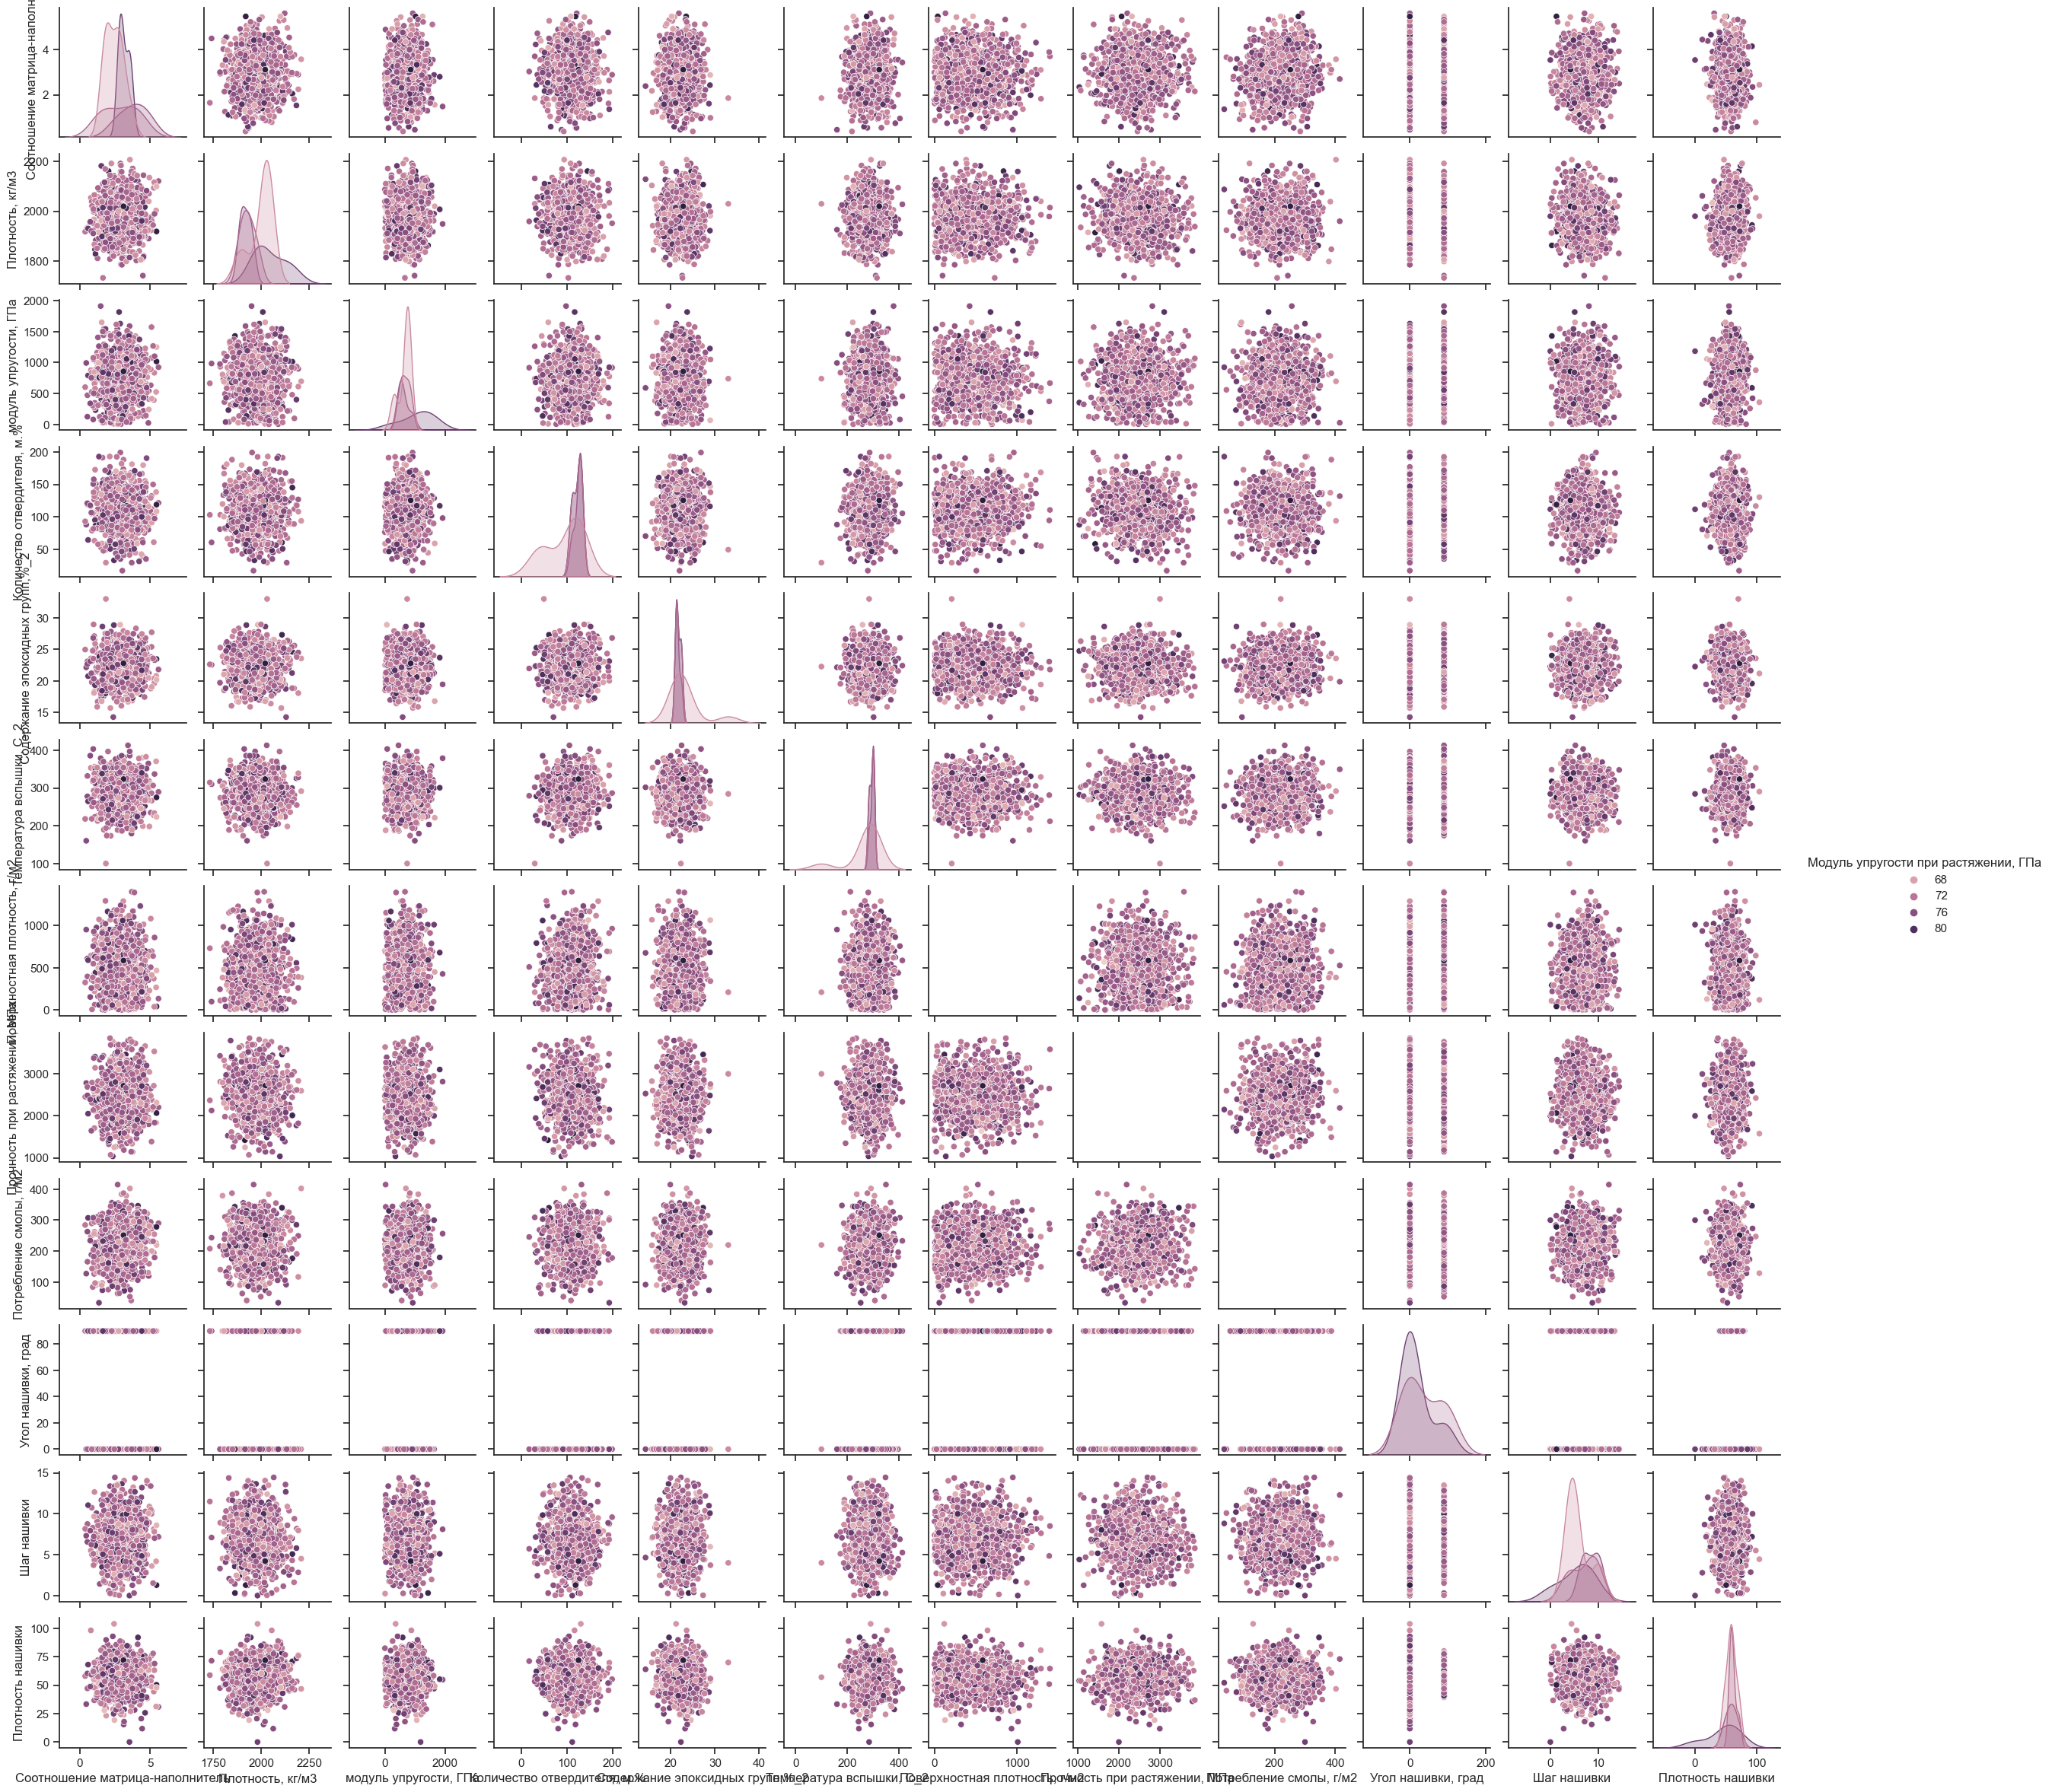

In [3]:
# с группировкой по целевому признаку
sns.pairplot(data, hue = 'Модуль упругости при растяжении, ГПа', height = 2, aspect = 1)

## Проверка корреляции признаков

In [8]:
data.corr(method = 'pearson')

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.003841   
модуль упругости, ГПа                                        0.031700   
Количество отвердителя, м.%                                 -0.006445   
Содержание эпоксидных групп,%_2                              0.019766   
Температура вспышки, С_2                                    -0.004776   
Поверхностная плотность, г/м2                               -0.006272   
Модуль упругости при растяжении, ГПа                        -0.008411   
Прочность при растяжении, МПа                                0.024148   
Потребление смолы, г/м2                                      0.072531   
Угол нашивки, град                                          -0.031073   
Шаг нашивки                                                  0.036437   
Плотность нашивки                                           -0.004652   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.003841               0.031700   
Плотность, кг/м3                              1.000000              -0.009647   
модуль упругости, ГПа                        -0.009647               1.000000   
Количество отвердителя, м.%                  -0.035911               0.024049   
Содержание эпоксидных групп,%_2              -0.008278              -0.006804   
Температура вспышки, С_2                     -0.020695               0.031174   
Поверхностная плотность, г/м2                 0.044930              -0.005306   
Модуль упругости при растяжении, ГПа         -0.017602               0.023267   
Прочность при растяжении, МПа                -0.069981               0.041868   
Потребление смолы, г/м2                      -0.015937               0.001840   
Угол нашивки, град                           -0.068474              -0.025417   
Шаг нашивки                                  -0.061015              -0.009875   
Плотность нашивки                             0.080304               0.056346   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                         -0.006445   
Плотность, кг/м3                                        -0.035911   
модуль упругости, ГПа                                    0.024049   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                         -0.000684   
Температура вспышки, С_2                                 0.095193   
Поверхностная плотность, г/м2                            0.055198   
Модуль упругости при растяжении, ГПа                    -0.065929   
Прочность при растяжении, МПа                           -0.075375   
Потребление смолы, г/м2                                  0.007446   
Угол нашивки, град                                       0.038570   
Шаг нашивки                                              0.014887   
Плотность нашивки                                        0.017248   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.019766   
Плотность, кг/м3                                            -0.008278   
модуль упругости, ГПа                                       -0.006804   
Количество отвердителя, м.%                                 -0.000684   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.009769   
Поверхностная плотность, г/м2                               -0.012940   
Модуль упругости при растяжении, ГПа                         0.056828   
Прочность при растяжении, МПа                               -0.023899   
Потребление смолы, г/м2                                      0.015165   
Угол нашивки, град                                           0.008052   
Шаг нашивки                          

<AxesSubplot: >

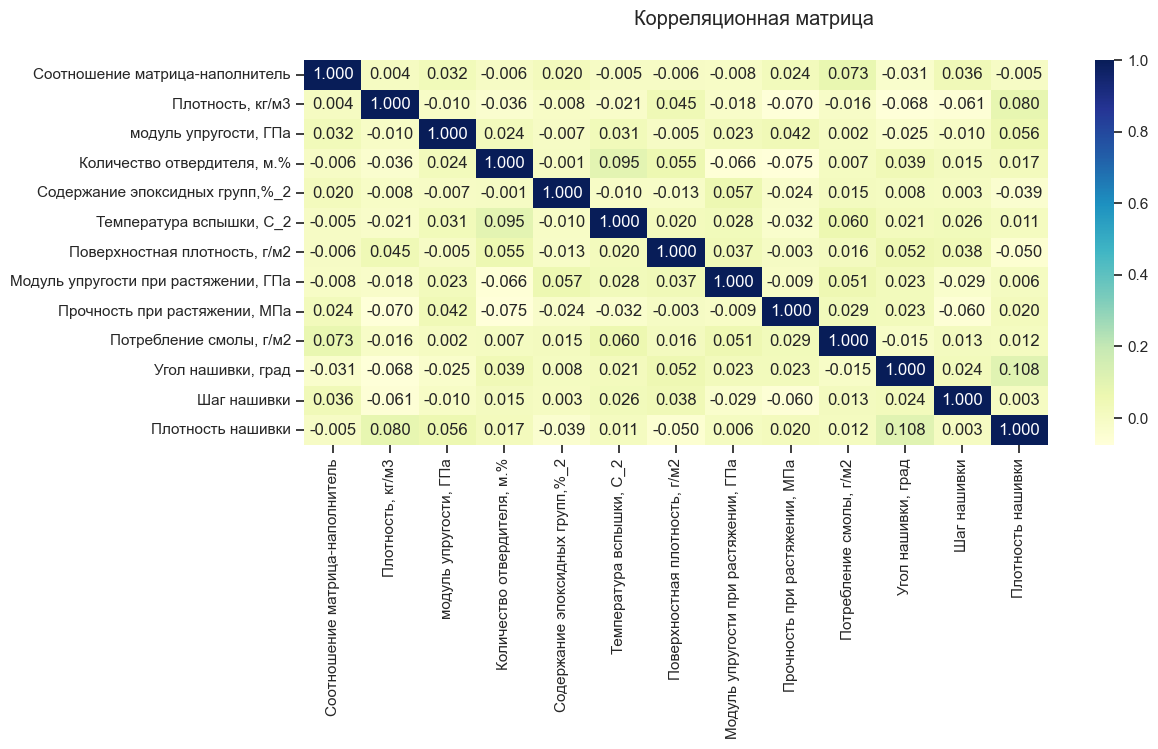

In [18]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(12,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(method = 'pearson'), ax=ax, annot=True, fmt='.3f', cmap='YlGnBu')